In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%matplotlib inline

In [3]:
# Load data
df = pd.read_csv("traffic_weather_full2020.csv")
df.head()

C:\Users\xwei\AppData\Local\Temp\ipykernel_36636\4046587241.py:2: DtypeWarning: Columns (12,13) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("traffic_weather_full2020.csv")


,5 Minutes,Flow,(mph),week_day,holidays,Hour,Day,Time,Temperature,Dew Point,Humidity,Wind,Wind Speed,Wind Gust,Pressure,Precip.,Condition
0,2/1/2020 0:00,338,66.0,6,1,2/1/2020 0:00,2/1/2020,12:00,55 F,29 F,37.0,VAR,3,0,29.39,0.0,Fair
1,2/1/2020 0:05,360,65.5,6,1,2/1/2020 0:05,2/1/2020,12:00,55 F,29 F,37.0,VAR,3,0,29.39,0.0,Fair
2,2/1/2020 0:10,347,65.2,6,1,2/1/2020 0:10,2/1/2020,12:00,55 F,29 F,37.0,VAR,3,0,29.39,0.0,Fair
3,2/1/2020 0:15,337,65.4,6,1,2/1/2020 0:15,2/1/2020,12:00,55 F,29 F,37.0,VAR,3,0,29.39,0.0,Fair
4,2/1/2020 0:20,302,66.3,6,1,2/1/2020 0:20,2/1/2020,12:00,55 F,29 F,37.0,VAR,3,0,29.39,0.0,Fair


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34823 entries, 0 to 34822
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   5 Minutes    34823 non-null  object 
 1   Flow         34823 non-null  int64  
 2   (mph)        34823 non-null  float64
 3   week_day     34823 non-null  int64  
 4   holidays     34823 non-null  int64  
 5   Hour         34823 non-null  object 
 6   Day          34823 non-null  object 
 7   Time         34823 non-null  object 
 8   Temperature  34823 non-null  object 
 9   Dew Point    34823 non-null  object 
 10  Humidity     34823 non-null  float64
 11  Wind         34655 non-null  object 
 12  Wind Speed   34823 non-null  object 
 13  Wind Gust    34823 non-null  object 
 14  Pressure     34823 non-null  float64
 15  Precip.      34823 non-null  float64
 16  Condition    34799 non-null  object 
dtypes: float64(4), int64(3), object(10)
memory usage: 4.5+ MB


### Data Processing

In [5]:
wind_speed = df['Wind Speed'].unique()
wind_speed

array(['3', '0', '5', '7', '8', '13', '16', '12', '9', '6', '15', '21',
       '18', '23', '24', '20', '22', '17', '20mph', '10', '14', '11mph',
       '30', '36', '33', '29', '28', '26', '12mph', '8mph', '9 mph', 5, 9,
       0, 3, 7, 6, 10, 8, 12, 13, 14], dtype=object)

In [6]:
wind_gust = df['Wind Gust'].unique()
wind_gust

array(['0', '17', '22', '29', '31', '38', '26', '30', '32', '35', '33',
       '23', '25', '16', '20', '13mph', '24', '37', '59', '45', '47',
       '44', '46', '36', '28', '21', '18', 0, 18], dtype=object)

In [7]:
# Define the function for extracting float numbers
def extract_float(value, string):
    return float(str(value).strip().replace(string, ''))

# Extract number from 'Wind Speed' and 'Wind Gust' columns and then convert to float
df['Wind Speed'] = df['Wind Speed'].apply(lambda x: extract_float(x, 'mph'))
df['Wind Gust'] = df['Wind Gust'].apply(lambda x: extract_float(x, 'mph'))

# Extract number from 'Dew Point' and 'Temperature' and then convert to float
df['Temperature'] = df['Temperature'].apply(lambda x: extract_float(x, 'F'))
df['Dew Point'] = df['Dew Point'].apply(lambda x: extract_float(x, 'F'))

df.head()

,5 Minutes,Flow,(mph),week_day,holidays,Hour,Day,Time,Temperature,Dew Point,Humidity,Wind,Wind Speed,Wind Gust,Pressure,Precip.,Condition
0,2/1/2020 0:00,338,66.0,6,1,2/1/2020 0:00,2/1/2020,12:00,55.0,29.0,37.0,VAR,3.0,0.0,29.39,0.0,Fair
1,2/1/2020 0:05,360,65.5,6,1,2/1/2020 0:05,2/1/2020,12:00,55.0,29.0,37.0,VAR,3.0,0.0,29.39,0.0,Fair
2,2/1/2020 0:10,347,65.2,6,1,2/1/2020 0:10,2/1/2020,12:00,55.0,29.0,37.0,VAR,3.0,0.0,29.39,0.0,Fair
3,2/1/2020 0:15,337,65.4,6,1,2/1/2020 0:15,2/1/2020,12:00,55.0,29.0,37.0,VAR,3.0,0.0,29.39,0.0,Fair
4,2/1/2020 0:20,302,66.3,6,1,2/1/2020 0:20,2/1/2020,12:00,55.0,29.0,37.0,VAR,3.0,0.0,29.39,0.0,Fair


In [8]:
# Check if '5 Minutes' and 'Hour' columns are identical
are_columns_identical = (df['5 Minutes'] == df['Hour']).all()

print(f"Are the '5 Minutes' and 'Hour' columns identical? {are_columns_identical}")

Are the '5 Minutes' and 'Hour' columns identical? True


In [9]:
# Convert the '5 Minutes' column to datetime
df['5 Minutes'] = pd.to_datetime(df['5 Minutes'], errors='coerce')

# Keep only the hour in the 'Hour' colum
df['Hour'] = df['5 Minutes'].dt.hour

df['Day_of_Month'] = df['5 Minutes'].dt.day

# Drop unrelavant column 'Time'
df = df.drop(columns=['Time', 'Day'])

### Handling Missing Values

In [10]:
# Remove duplicates
df.drop_duplicates(inplace=True)

In [11]:
print(f"Missing values percentage (%):")
df.isnull().sum()/len(df) * 100

Missing values percentage (%):


5 Minutes       0.00000
Flow            0.00000
(mph)           0.00000
week_day        0.00000
holidays        0.00000
Hour            0.00000
Temperature     0.00000
Dew Point       0.00000
Humidity        0.00000
Wind            0.48244
Wind Speed      0.00000
Wind Gust       0.00000
Pressure        0.00000
Precip.         0.00000
Condition       0.06892
Day_of_Month    0.00000
dtype: float64

In [12]:
# Fill NA values with the last known value (forward fill)
df['Wind'] = df['Wind'].ffill()
df['Condition'] = df['Condition'].ffill()

In [13]:
print(f"Missing values percentage (%) after imputation:")
df.isnull().sum() / len(df) * 100

Missing values percentage (%) after imputation:


5 Minutes       0.0
Flow            0.0
(mph)           0.0
week_day        0.0
holidays        0.0
Hour            0.0
Temperature     0.0
Dew Point       0.0
Humidity        0.0
Wind            0.0
Wind Speed      0.0
Wind Gust       0.0
Pressure        0.0
Precip.         0.0
Condition       0.0
Day_of_Month    0.0
dtype: float64

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34823 entries, 0 to 34822
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   5 Minutes     34823 non-null  datetime64[ns]
 1   Flow          34823 non-null  int64         
 2   (mph)         34823 non-null  float64       
 3   week_day      34823 non-null  int64         
 4   holidays      34823 non-null  int64         
 5   Hour          34823 non-null  int64         
 6   Temperature   34823 non-null  float64       
 7   Dew Point     34823 non-null  float64       
 8   Humidity      34823 non-null  float64       
 9   Wind          34823 non-null  object        
 10  Wind Speed    34823 non-null  float64       
 11  Wind Gust     34823 non-null  float64       
 12  Pressure      34823 non-null  float64       
 13  Precip.       34823 non-null  float64       
 14  Condition     34823 non-null  object        
 15  Day_of_Month  34823 non-null  int64 

### Feature Engineering

#### Creating lag features

In [15]:
# Create lag features (for previous 1, 2, and 3 intervals)
df['Flow_Lag1'] = df['Flow'].shift(1)
df['Flow_Lag2'] = df['Flow'].shift(2)
df['Flow_Lag3'] = df['Flow'].shift(3)

# Drop rows with NaN values in the lag features
df = df.dropna(subset=['Flow_Lag1', 'Flow_Lag2', 'Flow_Lag3'])



In [16]:
df.isnull().sum()

5 Minutes       0
Flow            0
(mph)           0
week_day        0
holidays        0
Hour            0
Temperature     0
Dew Point       0
Humidity        0
Wind            0
Wind Speed      0
Wind Gust       0
Pressure        0
Precip.         0
Condition       0
Day_of_Month    0
Flow_Lag1       0
Flow_Lag2       0
Flow_Lag3       0
dtype: int64

### Exploratory Data Analysis (EDA)

####  Univariate Analysis

In [17]:
df.describe()

,Flow,(mph),week_day,holidays,Hour,Temperature,Dew Point,Humidity,Wind Speed,Wind Gust,Pressure,Precip.,Day_of_Month,Flow_Lag1,Flow_Lag2,Flow_Lag3
count,34820.000000,34820.000000,34820.000000,34820.000000,34820.000000,34820.000000,34820.000000,34820.000000,34820.000000,34820.000000,34820.000000,34820.000000,34820.000000,34820.00000,34820.000000,34820.000000
mean,408.748535,65.626086,4.039460,0.313527,11.508300,62.090149,43.466657,55.483573,5.950373,1.030787,29.162435,0.002516,15.638800,408.75382,408.759075,408.763555
std,178.972280,5.761064,2.009554,0.463933,6.918688,10.272809,10.836959,21.130096,4.498766,5.196125,0.099288,0.021423,8.747703,178.96774,178.963622,178.959897
min,87.000000,24.100000,1.000000,0.000000,0.000000,35.000000,-16.000000,0.130000,0.000000,0.000000,28.910000,0.000000,1.000000,87.00000,87.000000,87.000000
25%,237.000000,65.300000,2.000000,0.000000,6.000000,55.000000,39.000000,41.000000,3.000000,0.000000,29.090000,0.000000,8.000000,237.00000,237.000000,237.000000
50%,421.000000,67.400000,4.000000,0.000000,12.000000,61.000000,46.000000,57.000000,6.000000,0.000000,29.150000,0.000000,16.000000,421.00000,421.000000,421.000000
75%,568.000000,68.300000,6.000000,1.000000,18.000000,68.000000,50.000000,72.000000,9.000000,0.000000,29.240000,0.000000,23.000000,568.00000,568.000000,568.000000
max,794.000000,71.100000,7.000000,1.000000,23.000000,98.000000,60.000000,97.000000,36.000000,59.000000,29.480000,0.700000,31.000000,794.00000,794.000000,794.000000


Numerical Variables:

Temperature, Dew Point, Humidity, Wind Speed, Wind Gust, Pressure, Precip., and Flow

In [18]:
numerical_cols = ['Flow', '(mph)', 'Temperature', 'Dew Point', 'Humidity', 'Wind Speed', 'Wind Gust', 'Pressure',
       'Precip.']
categorical_cols = [ 'week_day', 'holidays', 'Hour',  'Condition', 'Wind']

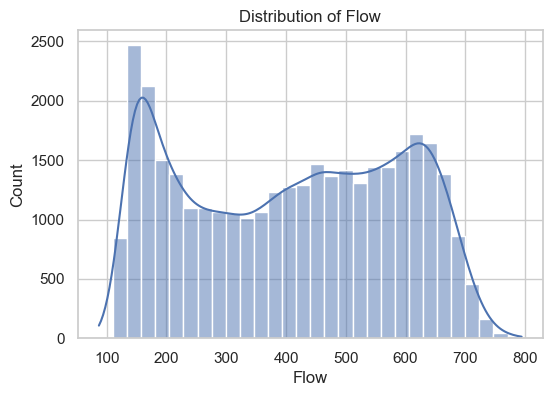

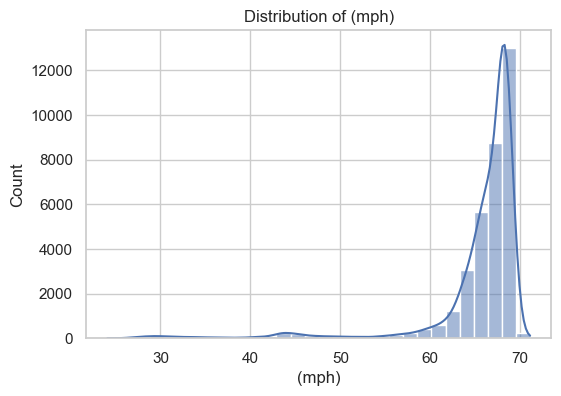

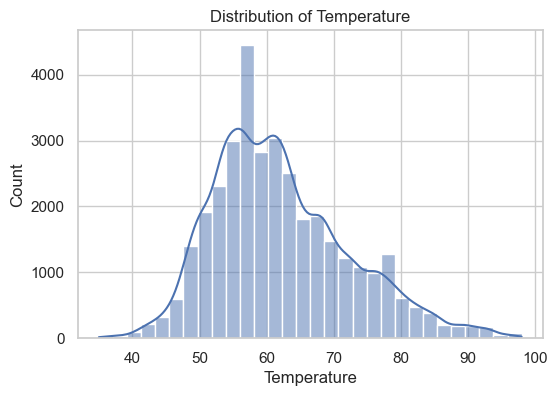

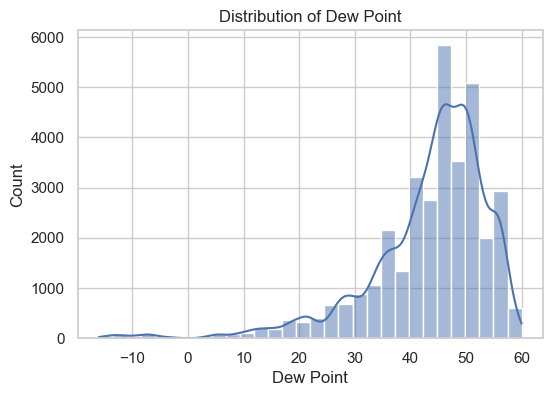

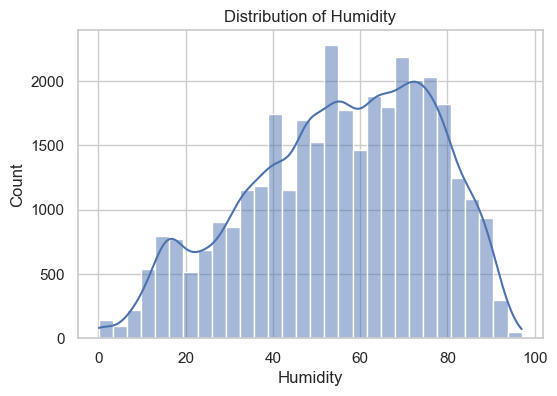

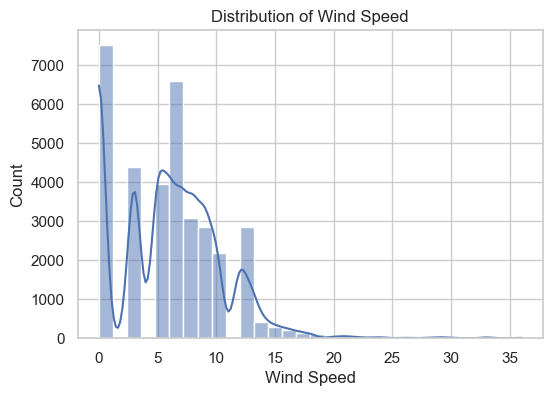

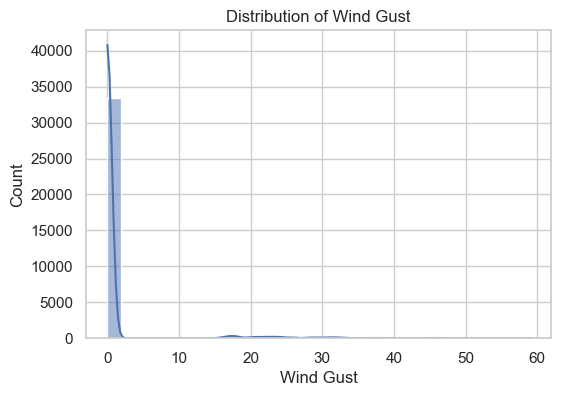

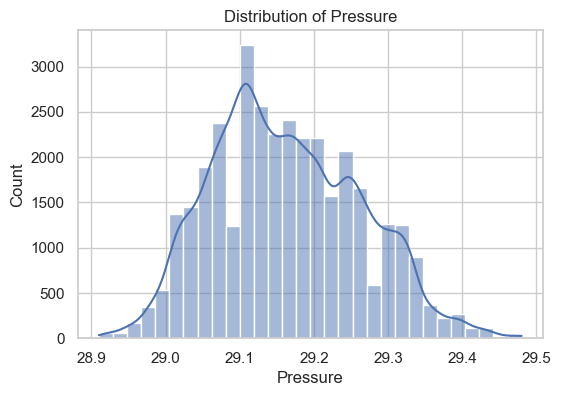

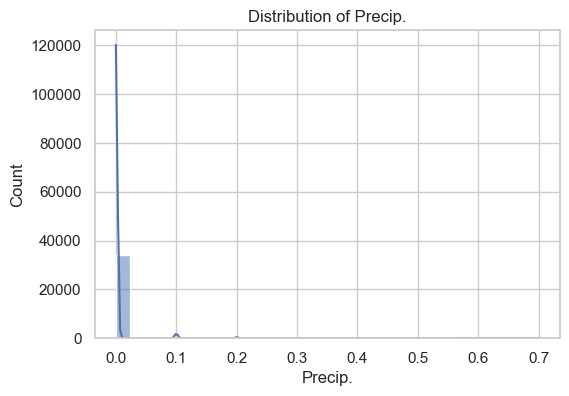

In [19]:
# Set style for seaborn
sns.set(style="whitegrid")

# Plot histograms for numerical features
for i, feature in enumerate(numerical_cols, 1):
    plt.figure(figsize=(6, 4))
    sns.histplot(df[feature], bins=30, kde=True)
    plt.title(f'Distribution of {feature}')
    plt.show()

1. Holidays
The holiday variable is binary (0 = non-holiday, 1 = holiday). The distribution shows significantly more non-holiday days compared to holiday days.
Insight: Holidays could represent special traffic patterns (e.g., less congestion during holidays). This imbalance may impact model performance, so consider this when splitting data or building models.
2. (mph) – Speed Limit/Driving Speed
The distribution is heavily skewed towards higher speeds, with most observations concentrated between 60–70 mph.
Insight: The skew suggests that the dataset might be capturing data from highways or roads with high-speed limits. This could imply different traffic dynamics compared to urban settings.
3. Pressure
The pressure distribution is nearly normal, with most values centered around 29.1–29.2 inHg.
Insight: Since atmospheric pressure is relatively stable, its impact on traffic might be subtle. However, small fluctuations may indicate changing weather conditions (e.g., storms, which could reduce traffic flow).
4. Temperature
The temperature distribution peaks around 60°F and is slightly right-skewed, with fewer occurrences of temperatures above 80°F or below 40°F.
Insight: This distribution shows moderate weather conditions, which could be ideal for driving. Extreme temperatures (hot or cold) are rare but could have significant effects on traffic flow when they occur.
5. Wind Gust
The distribution is extremely right-skewed, with most values concentrated at 0, indicating minimal gusty winds. Very few instances of higher gust speeds (10–60 mph) are present.
Insight: Wind gusts are rare in the dataset. Their effect, when present, could be drastic on traffic safety, but such events occur infrequently.
6. Wind Speed
The distribution is also right-skewed, with most values between 0–10 mph. Wind speeds above 15 mph are very rare.
Insight: Since most wind speeds are relatively low, moderate wind may not affect traffic much. However, spikes in wind speed could indicate adverse weather conditions that might significantly affect traffic flow.

Flow Distribution:

The distribution of traffic flow is multimodal, with peaks around 150 and 600, suggesting distinct traffic patterns. This could be influenced by different times of the day (e.g., peak hours) or days of the week (weekdays vs weekends).
There is a rapid drop after 700, implying fewer occurrences of high traffic flow, possibly representing rare, high-traffic conditions.

Insight: This distribution indicates variability in traffic conditions, which may require segmenting data into different periods (like rush hours) for better prediction accuracy.

Dew Point Distribution:

The dew point has a right-skewed distribution with most values between 40 and 55°F, peaking around 50°F.
Few data points fall below 20°F or above 60°F, indicating that extreme dew point conditions are rare.

Insight: The concentration of values around 50°F suggests relatively stable humidity levels, which may help in weather-related traffic prediction.

Humidity Distribution:

Humidity is approximately normally distributed, with a peak around 60-70%. Most values fall between 40% and 80%, indicating moderate humidity conditions.
There are fewer instances of extreme low (< 20%) or high (> 80%) humidity.
Insight: The balanced distribution of humidity indicates its steady presence, potentially impacting driving conditions like fog or wet roads, which could influence traffic flow.

Precipitation Distribution:

The precipitation data is heavily right-skewed, with most values being near zero. This indicates that there is little to no rainfall for most data points, and very few occurrences of measurable precipitation.

Insight: Since most days have no significant precipitation, the rare cases with rainfall could have a strong impact on traffic conditions when they do occur, making it a valuable variable for rare-event modeling.

C:\Users\xwei\AppData\Local\Temp\ipykernel_36636\1878513761.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=col, data=df, palette='Set2')  # Horizontal count plot


<Figure size 1200x800 with 0 Axes>

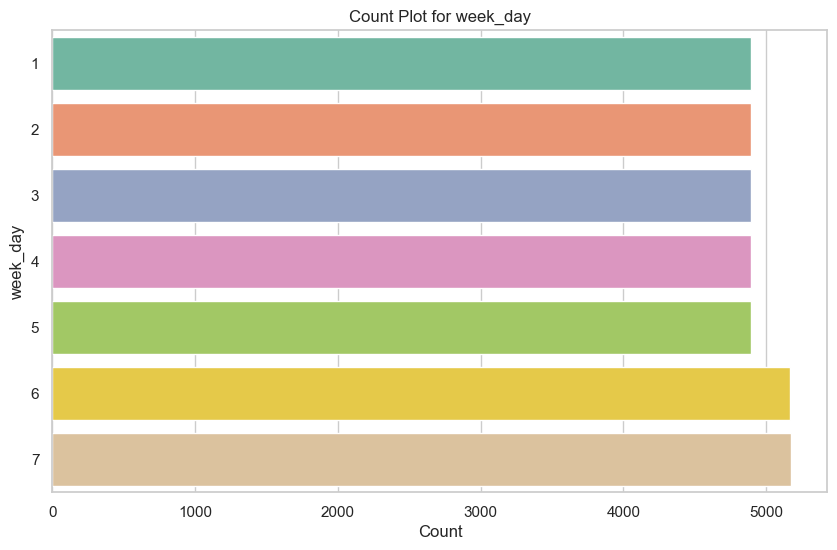

C:\Users\xwei\AppData\Local\Temp\ipykernel_36636\1878513761.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=col, data=df, palette='Set2')  # Horizontal count plot


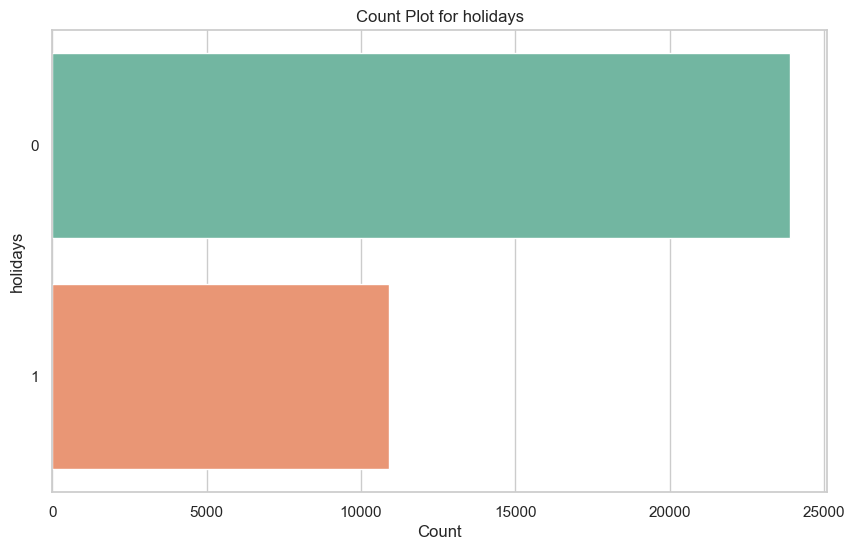

C:\Users\xwei\AppData\Local\Temp\ipykernel_36636\1878513761.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=col, data=df, palette='Set2')  # Horizontal count plot


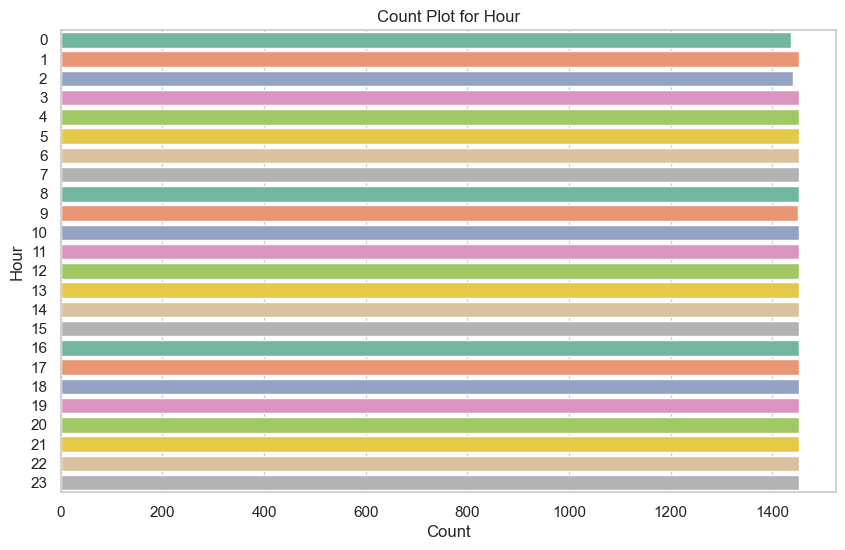

C:\Users\xwei\AppData\Local\Temp\ipykernel_36636\1878513761.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=col, data=df, palette='Set2')  # Horizontal count plot


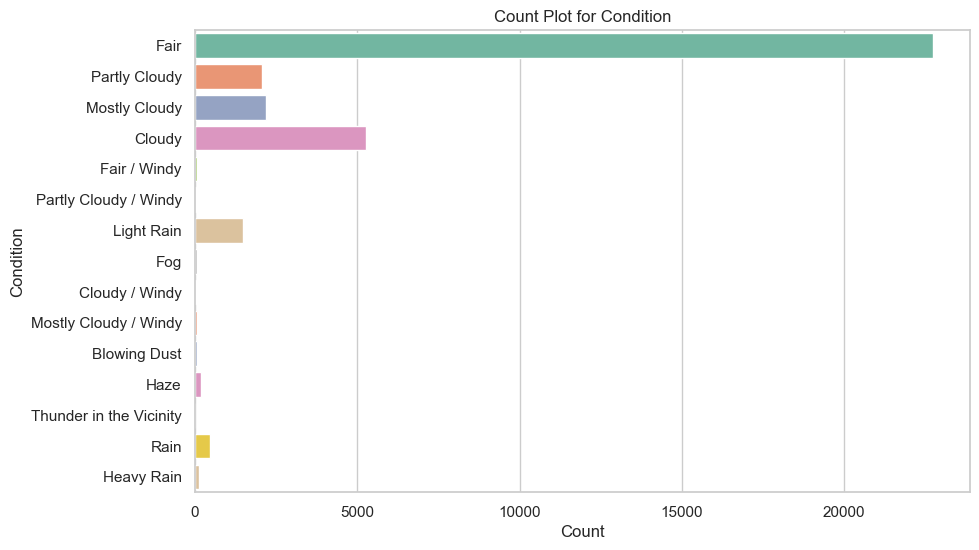

C:\Users\xwei\AppData\Local\Temp\ipykernel_36636\1878513761.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=col, data=df, palette='Set2')  # Horizontal count plot


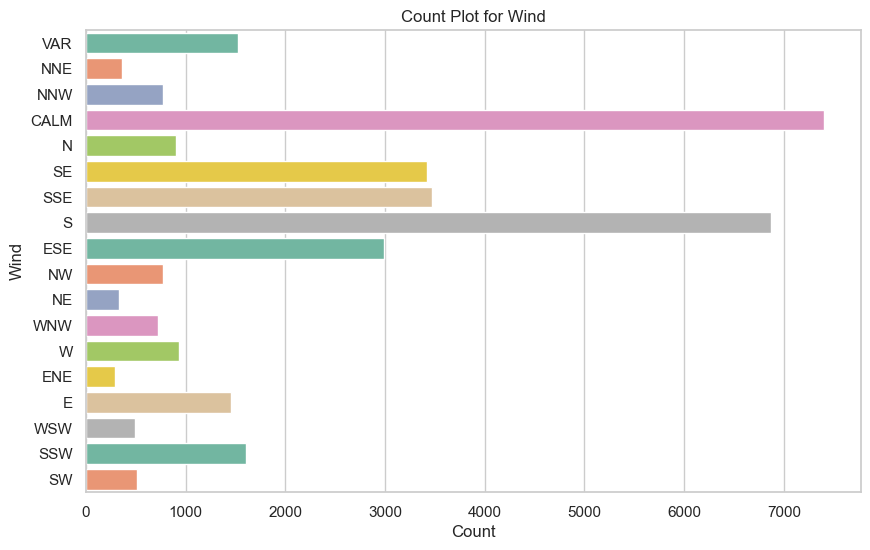

In [20]:
# Set the plot size and style
plt.figure(figsize=(12, 8))
sns.set(style="whitegrid")

# Create a count plot for each categorical column
for col in categorical_cols:
    plt.figure(figsize=(10, 6))
    sns.countplot(y=col, data=df, palette='Set2')  # Horizontal count plot
    plt.title(f'Count Plot for {col}')
    plt.xlabel('Count')
    plt.ylabel(col)
    plt.show()

#### Bivariate Analysis

1. Numerical vs. Numerical

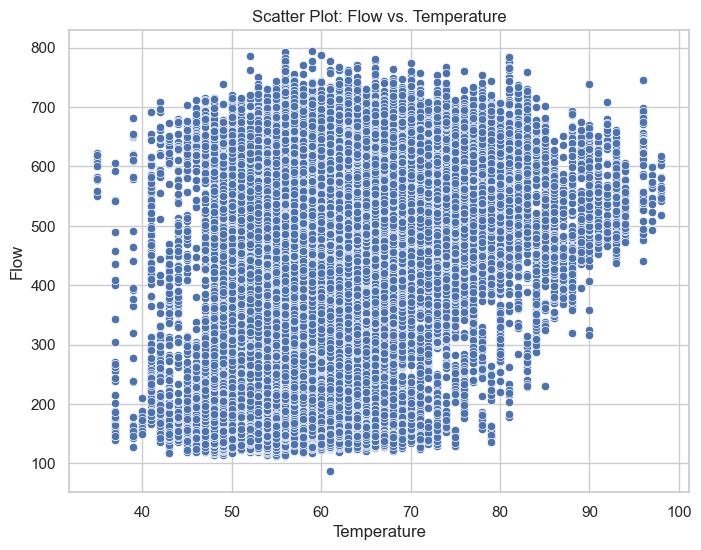

In [21]:
# Scatter Plot: Flow vs. Temperature
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Temperature', y='Flow', data=df)
plt.title('Scatter Plot: Flow vs. Temperature')
plt.show()


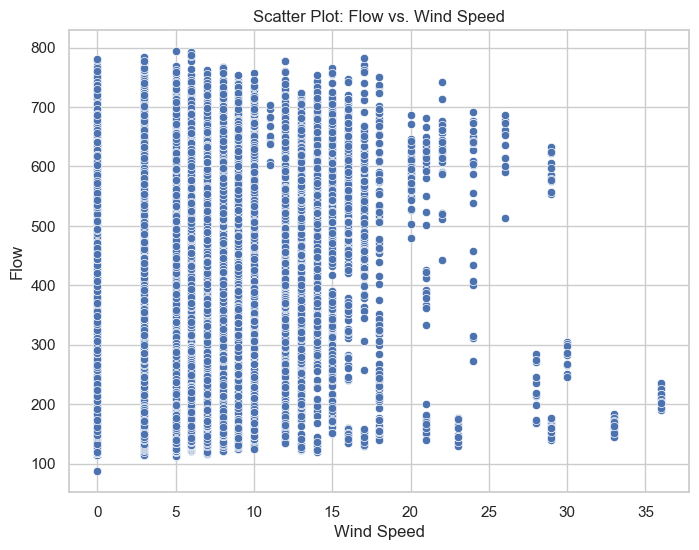

In [22]:
# Scatter Plot: Flow vs. Wind Speed
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Wind Speed', y='Flow', data=df)
plt.title('Scatter Plot: Flow vs. Wind Speed')
plt.show()


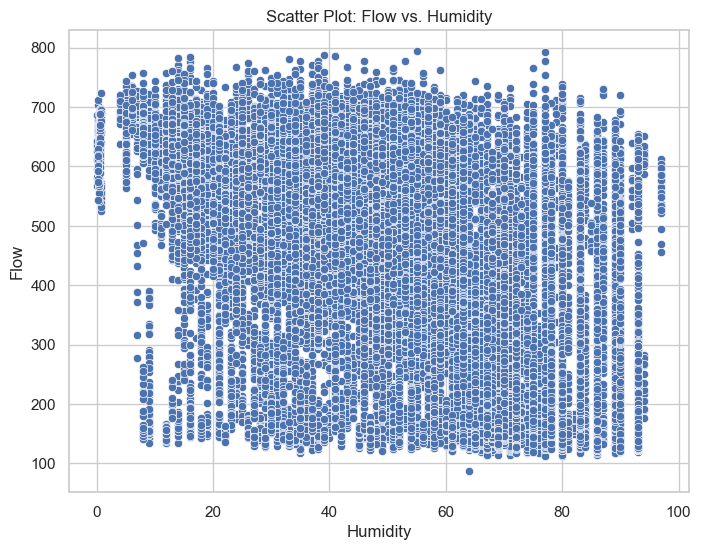

In [23]:
# Scatter Plot: Flow vs. Humidity
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Humidity', y='Flow', data=df)
plt.title('Scatter Plot: Flow vs. Humidity')
plt.show()


2. Categorical vs. Numerical

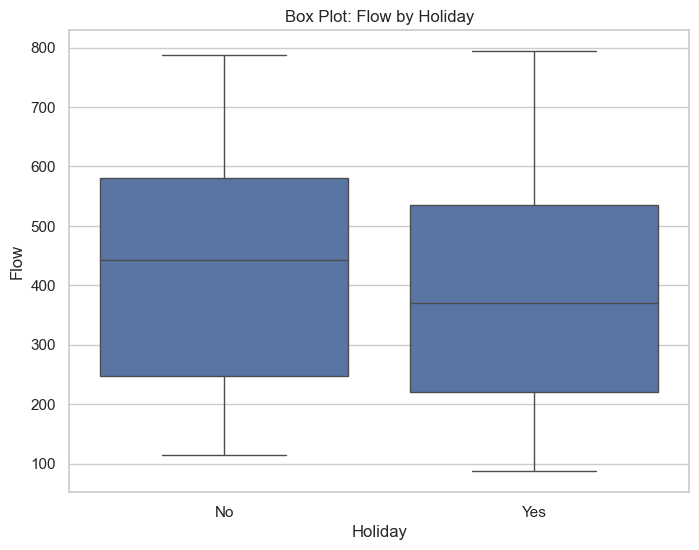

In [24]:
# Plot the box plot without modifying the dataset
plt.figure(figsize=(8, 6))
sns.boxplot(x='holidays', y='Flow', data=df)
plt.title('Box Plot: Flow by Holiday')
plt.xlabel('Holiday')  # Optional: Renaming the x-axis label for clarity
plt.xticks([0, 1], ['No', 'Yes'])  # Change x-axis labels to 'No' and 'Yes'
plt.show()


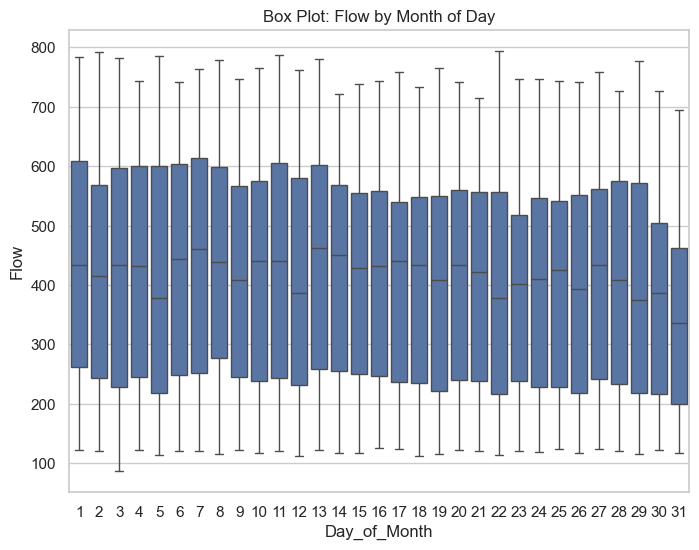

In [25]:
# Box Plot: Flow by Month of Day
plt.figure(figsize=(8, 6))
sns.boxplot(x='Day_of_Month', y='Flow', data=df)
plt.title('Box Plot: Flow by Month of Day')
plt.show()


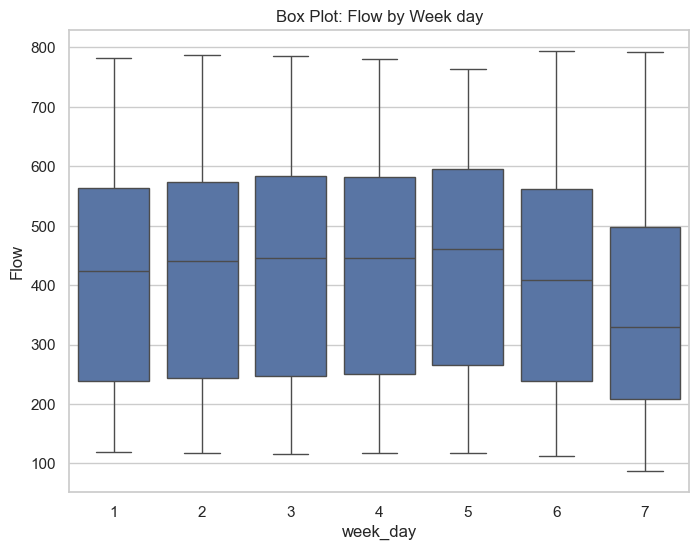

In [26]:
# Box Plot: Flow by Week day
plt.figure(figsize=(8, 6))
sns.boxplot(x='week_day', y='Flow', data=df)
plt.title('Box Plot: Flow by Week day')
plt.show()


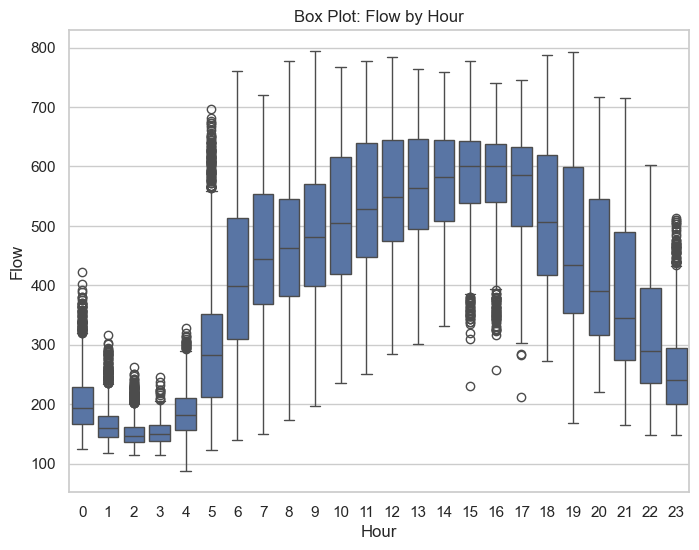

In [27]:
# Box Plot: Flow by Hour
plt.figure(figsize=(8, 6))
sns.boxplot(x='Hour', y='Flow', data=df)
plt.title('Box Plot: Flow by Hour')
plt.show()


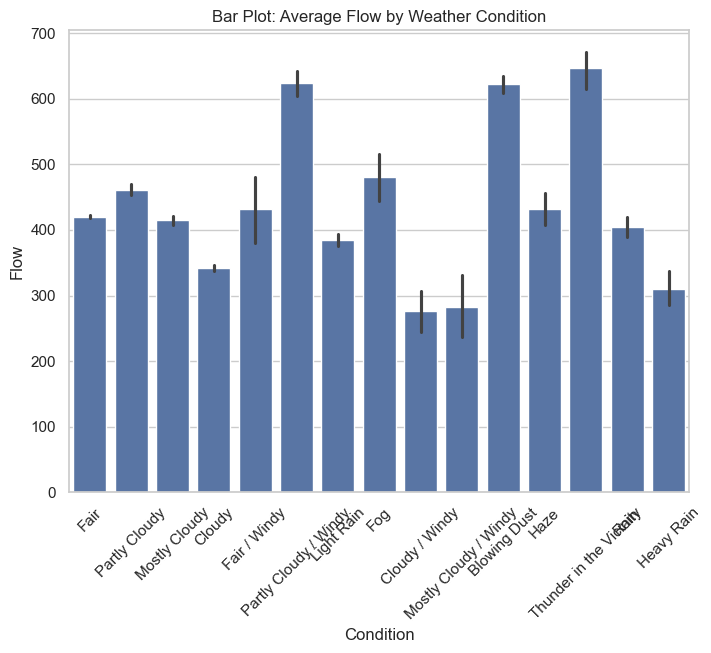

In [28]:
# Bar Plot: Average Flow by Condition
plt.figure(figsize=(8, 6))
sns.barplot(x='Condition', y='Flow', data=df, estimator=np.mean)
plt.title('Bar Plot: Average Flow by Weather Condition')
plt.xticks(rotation=45)
plt.show()


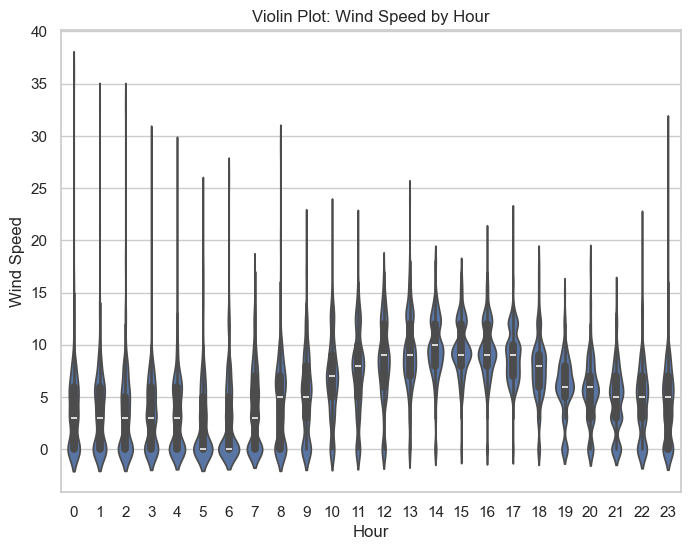

In [29]:
# Violin Plot: Wind Speed by Hour
plt.figure(figsize=(8, 6))
sns.violinplot(x='Hour', y='Wind Speed', data=df)
plt.title('Violin Plot: Wind Speed by Hour')
plt.show()


#### Multivariate Analysis

1. Correlation Heatmap (Numerical Variables)

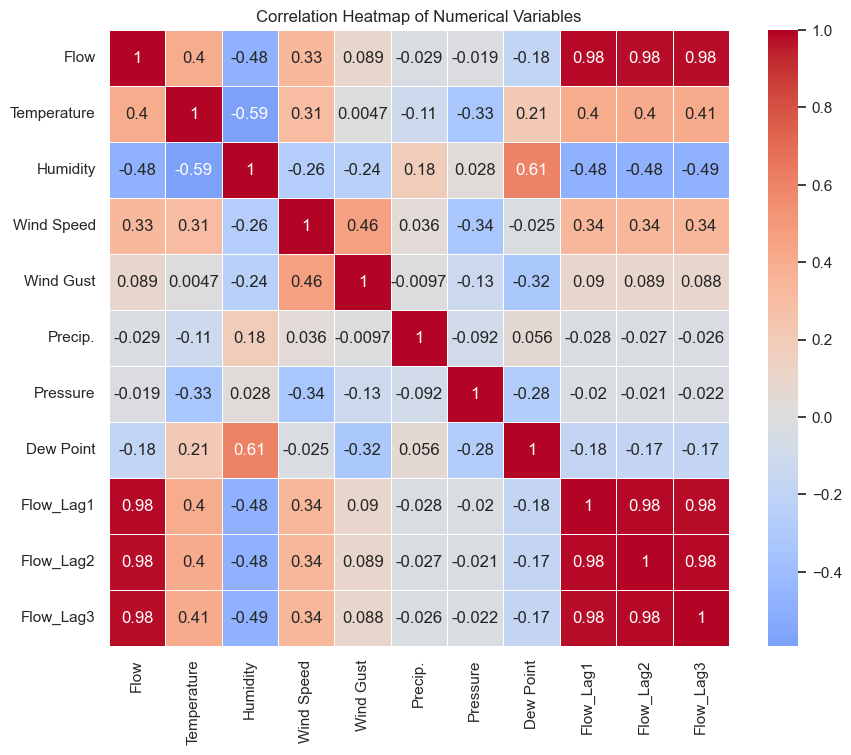

In [30]:
plt.figure(figsize=(10, 8))
corr_matrix = df[['Flow', 'Temperature', 'Humidity', 'Wind Speed', 'Wind Gust',
       'Precip.', 'Pressure', 'Dew Point', 'Flow_Lag1','Flow_Lag2','Flow_Lag3']].corr()
sns.heatmap(corr_matrix, annot=True, center=0, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Variables')
plt.show()


lag features (representing previous traffic flow values) show a strong correlation with current flow, highlighting the time-dependent nature of traffic and the importance of incorporating past flow data.

In [31]:
corr_matrix

,Flow,Temperature,Humidity,Wind Speed,Wind Gust,Precip.,Pressure,Dew Point,Flow_Lag1,Flow_Lag2,Flow_Lag3
Flow,1.000000,0.400076,-0.482681,0.334303,0.089479,-0.028685,-0.019326,-0.176293,0.984021,0.979452,0.975187
Temperature,0.400076,1.000000,-0.592084,0.307042,0.004651,-0.112062,-0.327373,0.211539,0.402414,0.404732,0.407088
Humidity,-0.482681,-0.592084,1.000000,-0.262592,-0.243658,0.176764,0.028010,0.605045,-0.483829,-0.484889,-0.486042
Wind Speed,0.334303,0.307042,-0.262592,1.000000,0.463400,0.035625,-0.339632,-0.024756,0.336450,0.338665,0.340683
Wind Gust,0.089479,0.004651,-0.243658,0.463400,1.000000,-0.009674,-0.128735,-0.322499,0.089627,0.089057,0.088321
Precip.,-0.028685,-0.112062,0.176764,0.035625,-0.009674,1.000000,-0.091510,0.055511,-0.027914,-0.026879,-0.025988
Pressure,-0.019326,-0.327373,0.028010,-0.339632,-0.128735,-0.091510,1.000000,-0.277032,-0.020408,-0.021442,-0.022440
Dew Point,-0.176293,0.211539,0.605045,-0.024756,-0.322499,0.055511,-0.277032,1.000000,-0.175163,-0.173962,-0.172826
Flow_Lag1,0.984021,0.402414,-0.483829,0.336450,0.089627,-0.027914,-0.020408,-0.175163,1.000000,0.984020,0.979451
Flow_Lag2,0.979452,0.404732,-0.484889,0.338665,0.089057,-0.026879,-0.021442,-0.173962,0.984020,1.000000,0.984019


In [39]:
df = pd.read_csv("traffic_weather_full2020.csv")
df.head()

C:\Users\xwei\AppData\Local\Temp\ipykernel_36636\370150164.py:1: DtypeWarning: Columns (12,13) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("traffic_weather_full2020.csv")


,5 Minutes,Flow,(mph),week_day,holidays,Hour,Day,Time,Temperature,Dew Point,Humidity,Wind,Wind Speed,Wind Gust,Pressure,Precip.,Condition
0,2/1/2020 0:00,338,66.0,6,1,2/1/2020 0:00,2/1/2020,12:00,55 F,29 F,37.0,VAR,3,0,29.39,0.0,Fair
1,2/1/2020 0:05,360,65.5,6,1,2/1/2020 0:05,2/1/2020,12:00,55 F,29 F,37.0,VAR,3,0,29.39,0.0,Fair
2,2/1/2020 0:10,347,65.2,6,1,2/1/2020 0:10,2/1/2020,12:00,55 F,29 F,37.0,VAR,3,0,29.39,0.0,Fair
3,2/1/2020 0:15,337,65.4,6,1,2/1/2020 0:15,2/1/2020,12:00,55 F,29 F,37.0,VAR,3,0,29.39,0.0,Fair
4,2/1/2020 0:20,302,66.3,6,1,2/1/2020 0:20,2/1/2020,12:00,55 F,29 F,37.0,VAR,3,0,29.39,0.0,Fair


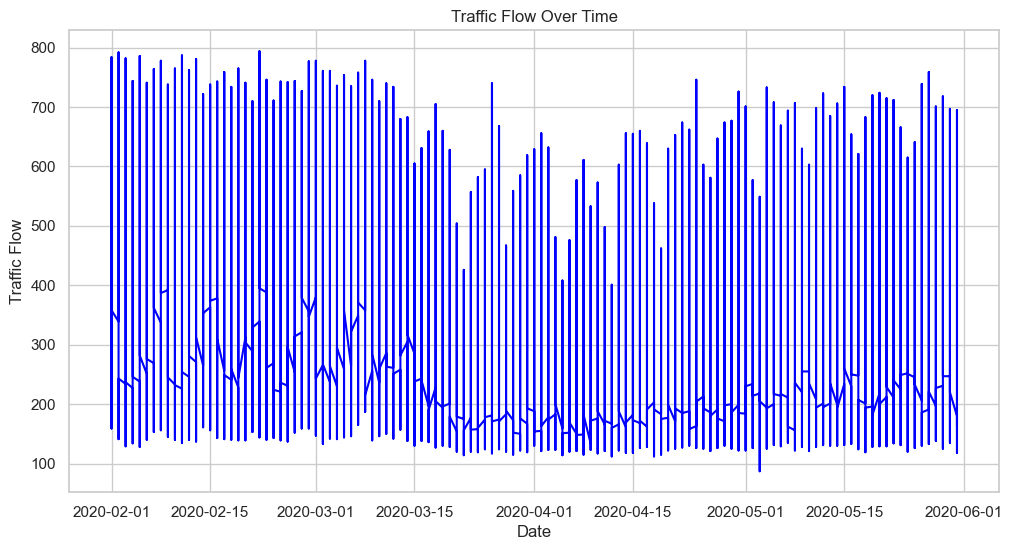

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Convert 'Day' column to datetime if it isn't already
df['Day'] = pd.to_datetime(df['Day'])

# Plot traffic flow over time
plt.figure(figsize=(12, 6))
plt.plot(df['Day'], df['Flow'], color='blue')
plt.title('Traffic Flow Over Time')
plt.xlabel('Date')
plt.ylabel('Traffic Flow')
plt.show()

C:\Users\xwei\AppData\Local\Temp\ipykernel_36636\2920925504.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_flow_by_day.index, y=avg_flow_by_day.values, palette="viridis")


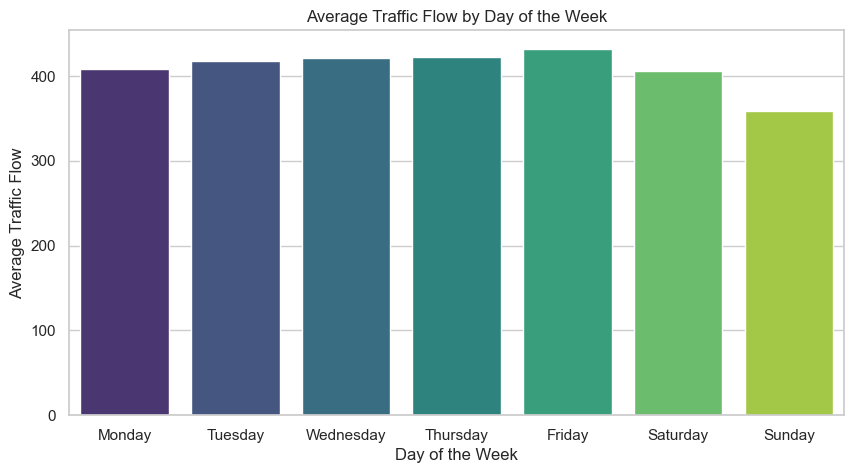

In [37]:
# Map week_day to meaningful names if needed
day_mapping = {1: 'Monday', 2: 'Tuesday', 3: 'Wednesday', 4: 'Thursday', 
               5: 'Friday', 6: 'Saturday', 7: 'Sunday'}
df['DayOfWeek'] = df['week_day'].map(day_mapping)

# Calculate average flow per day of the week
avg_flow_by_day = df.groupby('DayOfWeek')['Flow'].mean().reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

plt.figure(figsize=(10, 5))
sns.barplot(x=avg_flow_by_day.index, y=avg_flow_by_day.values, palette="viridis")
plt.title('Average Traffic Flow by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Average Traffic Flow')
plt.show()

In [45]:
# Function to convert temperature and other weather-related columns to numerical values
def convert_temperature(temp_str):
    """Converts temperature strings like '55 F' to float (e.g., 55.0)."""
    try:
        # Remove any non-numeric characters and convert to float
        return float(temp_str.replace("F", "").strip())
    except:
        return None

# Apply the conversion to relevant columns
df['Temperature'] = df['Temperature'].apply(convert_temperature)
df['Dew Point'] = df['Dew Point'].apply(convert_temperature)

In [46]:
# check non-numeric entries
columns_to_check = ['Wind Speed', 'Wind Gust']

# Find non-numeric entries in each specified column
for column in columns_to_check:
    non_numeric = df[pd.to_numeric(df[column], errors='coerce').isnull()]

In [47]:
# Replace 'mph' only in values containing 'mph' and keep numeric values as is
df['Wind Speed'] = df['Wind Speed'].apply(lambda x: pd.to_numeric(str(x).replace('mph', '').strip()) if 'mph' in str(x) else pd.to_numeric(x, errors='coerce'))
df['Wind Gust'] = df['Wind Gust'].apply(lambda x: pd.to_numeric(str(x).replace('mph', '').strip()) if 'mph' in str(x) else pd.to_numeric(x, errors='coerce'))

In [48]:
# check for non-numeric
columns_to_check = ['Wind Speed', 'Wind Gust', 'Temperature', 'Dew Point']

for column in columns_to_check:
    non_numeric = df[pd.to_numeric(df[column], errors='coerce').isnull()]

In [53]:
# Convert time and date fields to datetime
df['Hour'] = pd.to_datetime(df['Hour'], errors='coerce')
df['Day'] = pd.to_datetime(df['Day'], errors='coerce')
df['IsWeekend'] = df['week_day'].apply(lambda x: 1 if x >=6 else 0)
df.head()

,5 Minutes,Flow,(mph),week_day,holidays,Hour,Day,Time,Temperature,Dew Point,Humidity,Wind,Wind Speed,Wind Gust,Pressure,Precip.,Condition,IsWeekend
0,2/1/2020 0:00,338,66.0,6,1,2020-02-01 00:00:00,2020-02-01,12:00,55.0,29.0,37.0,VAR,3,0,29.39,0.0,Fair,1
1,2/1/2020 0:05,360,65.5,6,1,2020-02-01 00:05:00,2020-02-01,12:00,55.0,29.0,37.0,VAR,3,0,29.39,0.0,Fair,1
2,2/1/2020 0:10,347,65.2,6,1,2020-02-01 00:10:00,2020-02-01,12:00,55.0,29.0,37.0,VAR,3,0,29.39,0.0,Fair,1
3,2/1/2020 0:15,337,65.4,6,1,2020-02-01 00:15:00,2020-02-01,12:00,55.0,29.0,37.0,VAR,3,0,29.39,0.0,Fair,1
4,2/1/2020 0:20,302,66.3,6,1,2020-02-01 00:20:00,2020-02-01,12:00,55.0,29.0,37.0,VAR,3,0,29.39,0.0,Fair,1


In [57]:
print(df.columns)

Index(['5 Minutes', 'Flow', '(mph)', 'week_day', 'holidays', 'Hour', 'Day',
       'Time', 'Temperature', 'Dew Point', 'Humidity', 'Wind', 'Wind Speed',
       'Wind Gust', 'Pressure', 'Precip.', 'Condition', 'IsWeekend'],
      dtype='object')


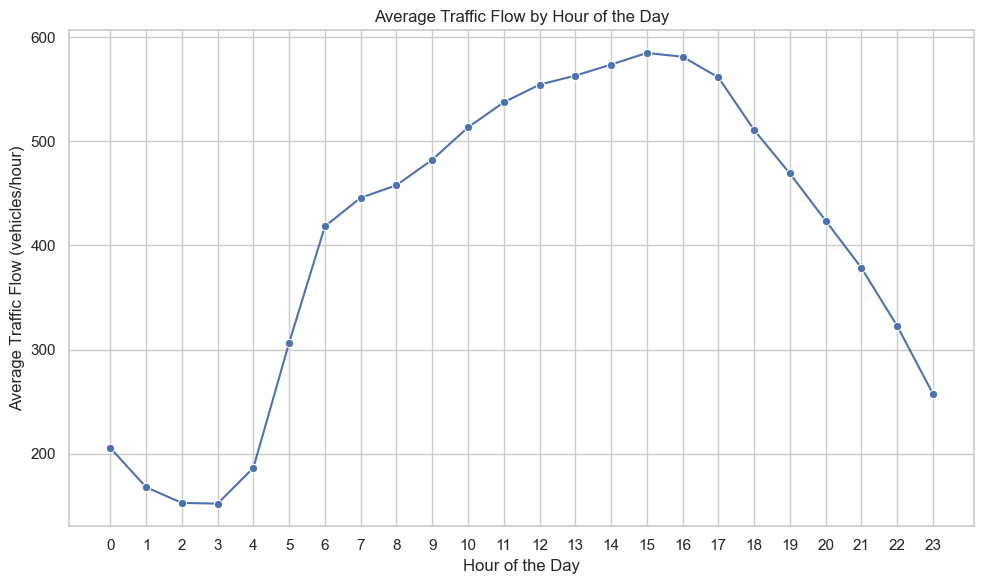

In [60]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

if 'Hour' in df.columns:
    if pd.api.types.is_datetime64_any_dtype(df['Hour']):
        df['hour'] = df['Hour'].dt.hour
    else:
        df['hour'] = pd.to_numeric(df['Hour'], errors='coerce').astype('Int64', errors='ignore')
else:
    df['hour'] = pd.to_datetime(df['datetime']).dt.hour

df['Flow'] = pd.to_numeric(df['Flow'], errors='coerce')

hourly_flow = df.groupby('hour', as_index=True)['Flow'].mean()
hourly_flow = hourly_flow.reindex(range(0, 24), fill_value=0)

plt.figure(figsize=(10, 6))
sns.lineplot(x=hourly_flow.index, y=hourly_flow.values, marker='o')
plt.title('Average Traffic Flow by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Traffic Flow (vehicles/hour)')
plt.grid(True)
plt.xticks(range(0, 24))  
plt.tight_layout()
plt.show()


C:\Users\xwei\AppData\Local\Temp\ipykernel_36636\308213192.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_flow_by_condition.index, y=avg_flow_by_condition.values, palette="coolwarm")


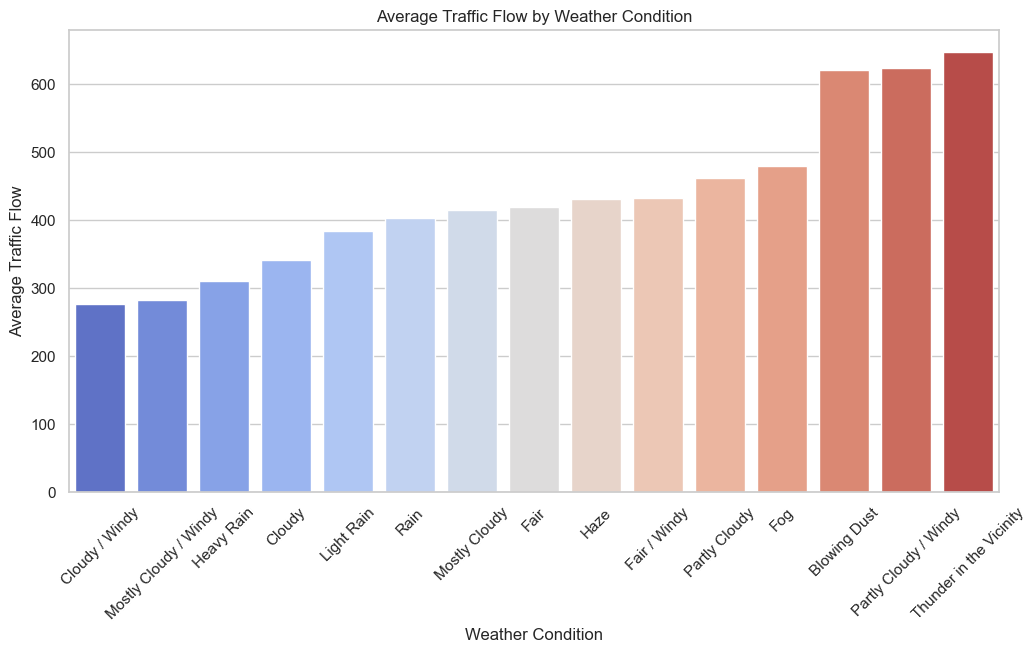

In [56]:
# Calculate average flow by weather condition
avg_flow_by_condition = df.groupby('Condition')['Flow'].mean().sort_values()

plt.figure(figsize=(12, 6))
sns.barplot(x=avg_flow_by_condition.index, y=avg_flow_by_condition.values, palette="coolwarm")
plt.title('Average Traffic Flow by Weather Condition')
plt.xlabel('Weather Condition')
plt.ylabel('Average Traffic Flow')
plt.xticks(rotation=45)  # Rotate for readability
plt.show()

C:\Users\xwei\AppData\Local\Temp\ipykernel_36636\1806108958.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_flow_holiday.index, y=avg_flow_holiday.values, palette="Blues")


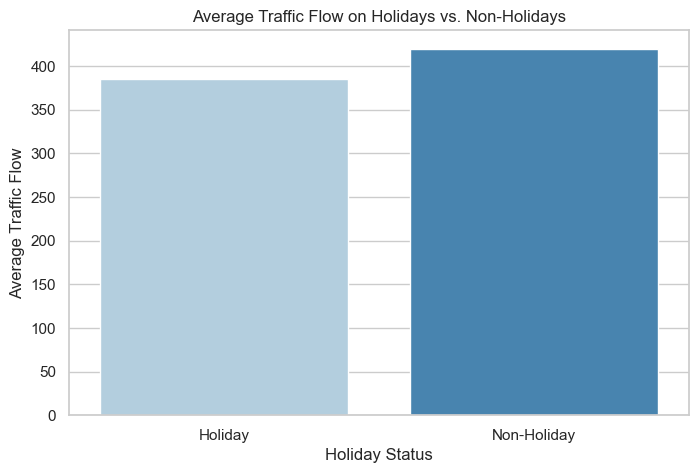

In [61]:
# Map holiday values to meaningful labels if needed
df['IsHoliday'] = df['holidays'].apply(lambda x: 'Holiday' if x == 1 else 'Non-Holiday')

# Calculate average flow for holidays and non-holidays
avg_flow_holiday = df.groupby('IsHoliday')['Flow'].mean()

plt.figure(figsize=(8, 5))
sns.barplot(x=avg_flow_holiday.index, y=avg_flow_holiday.values, palette="Blues")
plt.title('Average Traffic Flow on Holidays vs. Non-Holidays')
plt.xlabel('Holiday Status')
plt.ylabel('Average Traffic Flow')
plt.show()